Pandas and Widgets with Sina
====================

A sample Jupyter notebook that introduces users to a workflow using sina with a pandas DataFrame. Uses the Fukushime data set found in the Sina examples folder. The get_pd() function itself is not tied to any particular data set, and lends itself well to a variety of data needs.


## Connect to Sina
Connect to Sina as you usually do. Consult Sina documentation for more details. 

In [1]:
import sina.datastores.sql as sina_sql

# Initialization

#connection string
database = 'fukushima.sqlite'

#create factory
factory = sina_sql.DAOFactory(database)

#create record direct access object (dao)
rec_dao = factory.create_record_dao()

print("Handler created and data found, Sina is ready.")

Handler created and data found, Sina is ready.


## Declare Pandas Conversion Function

This function is the main interface between pandas and Sina. In this note book, it assumes the 'rec_dao' is a global that refers the record dao that interects with Sina. Feel free to copy/modify this function for use within your own workflow. Note that this function does drop units without doing any conversions. 

In [2]:
import pandas as pd
def get_pd(ids, fields=None):
    
    '''Uses global rec_dao to interact with sina. 
    ids is the list of record ids required for pandas df
    fields is the list of data fields required, defaults to all data fields
    returns a Pandas DataFrame with rows representing each record from ids, and columns representing each 
    field from fields. Note the a field containg list data will not not be useful right away.'''
    
    #get the full record objects for all ids
    records = rec_dao.get(ids)
    
    #if not specified, get all data field names
    if not fields:
        fields = next(records).data.keys()
        
    #turn list of records into a list of lists containg the data values
    recs = []
    for record in records:
        entry = []
        for field in fields:
            entry.append(record.data[field]['value'])
        recs.append(entry)
        
    #return a Dataframe 
    return pd.DataFrame(data=recs, columns=fields)

print('Pandas Function Declared')


Pandas Function Declared


## Testing our Pandas Conversion Function
After runnning this cell, you will find that all records of type 'obs' will be loaded into a data frame.

In [3]:
#get ids for all observations
ids = rec_dao.get_all_of_type("obs", ids_only=True)

#convert to pandas data frame
df = get_pd(ids)

#print and review
print(df)

          agl  alt_hae      date    gcnorm   latitude      live   longitude  \
0      151.00  244.135  4/5/2011  21576.30  37.761519  997066.0  140.959672   
1      149.50  243.184  4/5/2011  21242.52  37.760735  997057.0  140.959890   
2      161.04  242.065  4/5/2011  19313.66  37.759945  997843.0  140.960111   
3      171.78  242.198  4/5/2011  16359.40  37.759161  997653.0  140.960330   
4      184.99  244.656  4/5/2011  15426.35  37.758375  997579.0  140.960547   
...       ...      ...       ...       ...        ...       ...         ...   
32430  295.21  333.202  5/9/2011   2110.32  37.113168  999849.0  141.162406   
32431  300.28  338.269  5/9/2011   2103.31  37.112592  999851.0  141.161819   
32432  306.23  344.226  5/9/2011   2042.26  37.112044  999874.0  141.161197   
32433  312.28  350.274  5/9/2011   2164.32  37.111524  999854.0  141.160542   
32434  318.82  356.816  5/9/2011   2071.35  37.111030  999833.0  141.159849   

             time  
0      2:11:30 AM  
1      2:11

## Demonstrating a query before pandas conversion 1
You can use sina to query for data to fall within certain values, then turn all of the resulting records into a dataframe. The cell bellow builds a df with all records where the  date is 4/18/2011. 

In [4]:
#run query and get ids
ids = rec_dao.data_query(date='4/18/2011')

#convert to pandas data frame
df = get_pd(ids)

#print and review
print(df)

          agl  alt_hae       date    gcnorm   latitude      live   longitude  \
0      219.23  259.559  4/18/2011   4159.33  37.475081  999681.0  141.069262   
1      188.21  228.662  4/18/2011   3240.89  37.657043  999724.0  141.110756   
2      186.88  226.561  4/18/2011  18814.51  37.271664  998910.0  141.068658   
3      191.11  230.582  4/18/2011  19270.37  37.224359  998839.0  141.069147   
4      188.49  229.344  4/18/2011   3274.63  37.752801  999807.0  141.072160   
...       ...      ...        ...       ...        ...       ...         ...   
16683  195.74  235.718  4/18/2011   3288.85  37.698602  999741.0  141.234572   
16684  167.28  206.567  4/18/2011   7728.78  37.223599  999511.0  141.089535   
16685  181.84  221.721  4/18/2011  12349.21  37.279879  999254.0  141.048027   
16686  160.88  199.981  4/18/2011  17354.42  37.309325  999054.0  141.152679   
16687  259.58  298.330  4/18/2011   4614.58  37.343494  999657.0  141.214757   

             time  
0      1:52:57 AM  

## Demonstrating a query before pandas conversion 2
You can use sina to query for data to fall within certain values, then turn all of the resulting records into a dataframe. In this example, we will use the fields option so that our data frame only contains the data fields altitude, longitude, latitude and gcnorm. The cell below builds a df with all records where alt_hae is between 200 and 300. This uses one of Sina's special query functions, DataRange, see query documentation for more deatils. 

In [5]:
#required for DataRange function
from sina.utils import DataRange

#run query and get ids
ids = rec_dao.data_query(alt_hae=DataRange(200,300))

#specify which fields you want
fields = ['alt_hae', 'gcnorm', 'latitude', 'longitude']


#convert to pandas data frame
df = get_pd(ids, fields)

#print and review
print(df)

       alt_hae    gcnorm   latitude   longitude
0      223.467   3321.24  37.755789  141.172620
1      229.344   3274.63  37.752801  141.072160
2      226.126   6099.41  37.518734  141.204983
3      215.785   2250.27  37.499287  141.151832
4      234.303   2285.61  37.230945  141.081252
...        ...       ...        ...         ...
30045  211.975   6271.48  37.589888  141.040528
30046  235.718   3288.85  37.698602  141.234572
30047  234.648   2227.46  37.164804  141.155725
30048  216.020   2311.61  37.711249  141.031898
30049  221.721  12349.21  37.279879  141.048027

[30050 rows x 4 columns]


## Accessing Data with Panda
This is a quick demonstration of how to access your data once it is in a data frame. In general, you access columns of data rather than individual records. 

In [6]:
#get ids for all observations
ids = rec_dao.get_all_of_type("obs", ids_only=True)

#convert to pandas data frame
df = get_pd(ids)

#getting a single column
altitude = df['alt_hae']
print('A single Element DataFrame is really just a pandas series. Note that there is no column name')
print(altitude)
print()

#getting a subset of collumns
cols = ['latitude', 'longitude']
coordinates = df[cols]
print('A subset DataFrame')
print(coordinates)
print()

#modifying an existing column
new_sea_level=5
df['alt_hae'] = df['alt_hae'] - new_sea_level
print("Modified Data with sea level rise")
print(df['alt_hae'])
print()

#getting a subset of records
new_df = df[df['date']=='4/5/2011']
print('A subset of records, only records with date 4/5/2011')
print(new_df)
print()

#get a random subset of records, in this case 5
random_df = df.sample(n=5)
print('A random subset of records')
print(random_df)
print()



A single Element DataFrame is really just a pandas series. Note that there is no column name
0        244.135
1        243.184
2        242.065
3        242.198
4        244.656
          ...   
32430    333.202
32431    338.269
32432    344.226
32433    350.274
32434    356.816
Name: alt_hae, Length: 32435, dtype: float64

A subset DataFrame
        latitude   longitude
0      37.761519  140.959672
1      37.760735  140.959890
2      37.759945  140.960111
3      37.759161  140.960330
4      37.758375  140.960547
...          ...         ...
32430  37.113168  141.162406
32431  37.112592  141.161819
32432  37.112044  141.161197
32433  37.111524  141.160542
32434  37.111030  141.159849

[32435 rows x 2 columns]

Modified Data with sea level rise
0        239.135
1        238.184
2        237.065
3        237.198
4        239.656
          ...   
32430    328.202
32431    333.269
32432    339.226
32433    345.274
32434    351.816
Name: alt_hae, Length: 32435, dtype: float64

A subset of r

## More Basic Accessing, Get Max and Min Values
A few quick examples of getting min/max values from pandas df

In [28]:
#get ids for all observations
ids = rec_dao.get_all_of_type("obs", ids_only=True)

#convert to pandas data frame
df = get_pd(ids)

#get k largest gcnorm values
k = 10
klarge = df.nlargest(k, 'gcnorm')
print("Here are the {} largest valuse for gcnorm".format(k))
print(klarge)
print()

#get k smallest altitude values
k = 10
ksmall = df.nsmallest(k, 'alt_hae')
print("Here are the {} smallest valuse for altitude".format(k))
print(ksmall)
print()

Here are the 10 largest valuse for gcnorm
          agl  alt_hae      date      gcnorm   latitude      live   longitude  \
21549  163.76  205.746  5/9/2011  3558689.66  37.420308  801257.0  141.038977   
21550  165.49  206.990  5/9/2011  3459277.01  37.421260  810439.0  141.039004   
21548  161.48  203.155  5/9/2011  3166295.95  37.419359  826779.0  141.038943   
21551  168.06  208.650  5/9/2011  3026025.65  37.422211  836521.0  141.039044   
21547  160.96  201.345  5/9/2011  2371515.14  37.418402  875967.0  141.038919   
21552  169.14  209.557  5/9/2011  2328225.32  37.423155  879533.0  141.039077   
21553  168.60  211.327  5/9/2011  1578088.63  37.424101  917323.0  141.039123   
21546  161.22  201.595  5/9/2011  1503198.01  37.417447  921512.0  141.038904   
21554  173.44  214.799  5/9/2011   935729.17  37.425043  951427.0  141.039174   
21545  161.47  201.836  5/9/2011   841109.46  37.416487  955960.0  141.038882   

             time  
21549  6:32:14 AM  
21550  6:32:15 AM  
21548 

## Data Manipulation and Plotting
Here we will use longitude and latitude coordinates to find the distance from the reactor, then plot the gcnorm against that distance. The haversine function below is used to demonstrate vectorized operations with pandas. In general, you should not use a for loop to modify/create data. For more information, review pandas documentation 

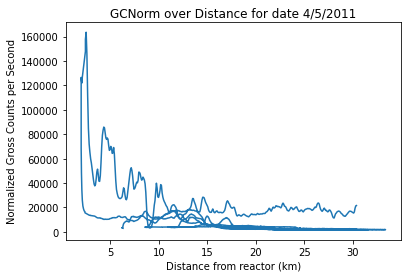

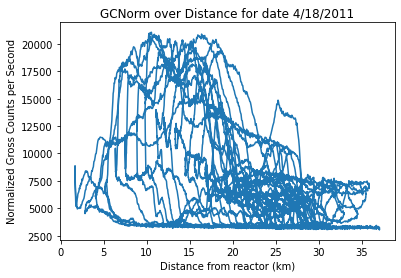

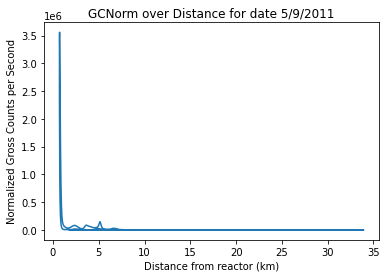

In [7]:
import numpy as np
import matplotlib.pyplot as plt


#function to get distance (km) between two points in longitude/latitude
#important for code relating to making new columns from old data
#note that we use the numpy library, this allows us to vectorize our code. 
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    KM = 6371
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_km = KM * c
    return total_km

#get ids for all observations
ids = rec_dao.get_all_of_type("obs", ids_only=True)

#convert to pandas data frame
df = get_pd(ids)

#making a new column using existing columns. 
reactor = [37.4227,141.0327 ]
df['distance'] = haversine(df['longitude'], df['latitude'], reactor[1], reactor[0])


#Now that we have the distance, we want to plot by date.
dates = df['date'].unique()
for date in dates:
    plot_df = df[df['date']==date]
    x = plot_df['distance']
    y = plot_df['gcnorm']
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x,y)
    ax.set_xlabel("Distance from reactor (km)")
    ax.set_ylabel("Normalized Gross Counts per Second")
    ax.set_title('GCNorm over Distance for date {}'.format(date))


## 3D Plots with Pandas
Here, we will demonstrate how to produce a 3D plot using data from a DataFrame and matplot lib. Note that this plot interpolates the surface by creating triangles with adjacent points. 

Text(0.5, 0.92, 'Heat Map by Latitude and longitude')

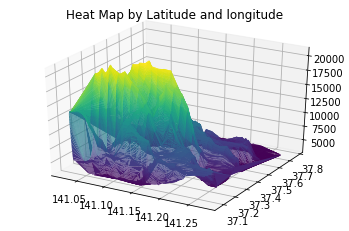

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# get ids for a single date
ids = rec_dao.data_query(date='4/18/2011')


#convert to pandas data frame
df = get_pd(ids)

fig = plt.figure()
ax = plt.axes(projection='3d')


x = df['longitude']
y = df['latitude']
z = df['gcnorm']
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('Heat Map by Latitude and longitude')

## Another 3D Plot example
By combining concepts from the last two cells, we can create a heat map that include both distance from the reactor and altitude. 

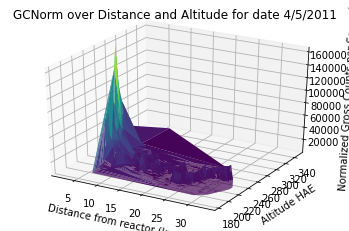

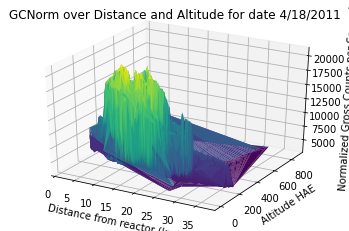

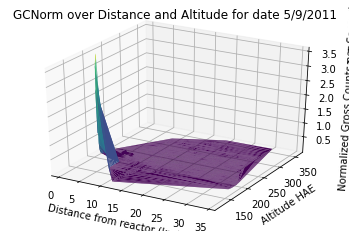

In [9]:
import numpy as np
import matplotlib.pyplot as plt


#function to get distance (miles) between two points in longitude/latitude
#important for code relating to making new columns from old data
#note that we use the numpy library, this allows us to vectorize our code. 
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    KM = 6371
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_km = KM * c
    return total_km

#get ids for all observations
ids = rec_dao.get_all_of_type("obs", ids_only=True)

#convert to pandas data frame
df = get_pd(ids)

#making a new column using existing columns. 
reactor = [37.4227,141.0327 ]
df['distance'] = haversine(df['longitude'], df['latitude'], reactor[1], reactor[0])


#Now that we have the distance, we want to plot by date.
dates = df['date'].unique()
for date in dates:
    plot_df = df[df['date']==date]
    x = plot_df['distance']
    z = plot_df['gcnorm']
    y = plot_df['alt_hae']
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    ax.set_xlabel("Distance from reactor (km)")
    ax.set_ylabel("Altitude HAE")
    ax.set_zlabel("Normalized Gross Counts per Second")
    ax.set_title('GCNorm over Distance and Altitude for date {}'.format(date))


## Using Pandas for outlier detection and removal
This data set does not seem to have very many outliers from what I can tell, but this is an example of how it could be done using the zscore method.

Text(0.5, 0.92, 'Heat Map by Latitude and longitude')

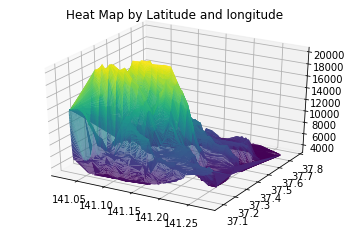

In [10]:
from scipy.stats import zscore
import numpy as np



def remove_outliers(features, target):
    '''Uses Z-score to identify outliers. Takes in a pandas DF with only features as first argument
    second argument is pandas DF with only labels'''
    z = np.abs(zscore(features))
    
    df = pd.concat([features, target], axis = 1)
    
    return df[(z <3).all(axis=1)]

#get ids for all observations
ids = rec_dao.data_query(date='4/18/2011')

#convert to pandas data frame
df = get_pd(ids)

#only select numeric types as your features
features = df.select_dtypes(exclude='object')

#get just your targets
targets = df.select_dtypes(include='object')


df = remove_outliers(features, targets)


#plot results, maybe be more useful with other data sets
fig = plt.figure()
ax = plt.axes(projection='3d')


x = df['longitude']
y = df['latitude']
z = df['gcnorm']
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('Heat Map by Latitude and longitude')


## Example with Linear Regresion
This example shows some use with linear regression. Here, we do some feature engineering, train a model, and test that model. The models goal is to be able to determine gcnorm based on distance from the reactor, altitude, and days since the event. This model does not perform particularily well, but does serve as an example as to how it may be done with pandas and sklearn.

Text(0.5, 0, 'GCNorm')

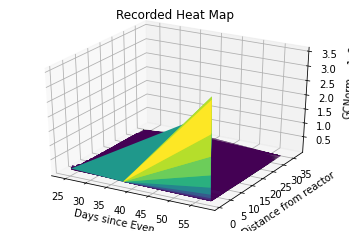

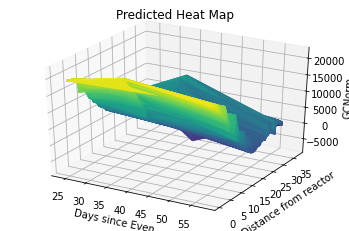

In [20]:
from sklearn.linear_model import LinearRegression

#load data from sina

#get ids for all observations
ids = rec_dao.get_all_of_type("obs", ids_only=True)

#convert to pandas data frame
df = get_pd(ids)

#feature engineering

#use haversine function declared in above cells to get distance measure
reactor = [37.4227,141.0327 ]
df['distance'] = haversine(df['longitude'], df['latitude'], reactor[1], reactor[0])

#calculate days since reactor disaster
#use a dictionary to map strings to ints, using the df.replace() method
dates = {'4/5/2011':24, '4/18/2011':37, '5/9/2011':58}
df['days_since'] = df['date'].replace(dates)

#train the model

#our 3 features are altitude, distance, days
feature_labels = ['alt_hae', 'distance', 'days_since']

#get features vector, and concatentate. x, x^2, x^3
X = df[feature_labels].values
for i in range(2,4):
    X = np.concatenate((X, X**i), axis=1)
    
#get labels    
Y = df['gcnorm'].values


#fit the regression
reg = LinearRegression().fit(X, Y)


#view the results 
zprime = reg.predict(X)

x = df['days_since']
y = df['distance']
z = df['gcnorm']

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('Recorded Heat Map')
ax.set_xlabel('Days since Even')
ax.set_ylabel('Distance from reactor')
ax.set_zlabel('GCNorm')

print('\n\n')

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, zprime, cmap='viridis', edgecolor='none')
ax.set_title('Predicted Heat Map')
ax.set_xlabel('Days since Even')
ax.set_ylabel('Distance from reactor')
ax.set_zlabel('GCNorm')


In [149]:
factory.close()